<a href="https://colab.research.google.com/github/AtulChouhan0/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

# **Why we are doing customer segmentation ?**
**To answer following questions**
# **1. We wanna know who are my customers**
# **2. how much they purches**
# **3. what they purches(product name)**
# **3. when they purches (i.e seasonal trend ,if exist in the dataset)**
# **4. customer budget**
# **5. how frequent they purches**


# **so, I can do capacity planing and also I can target my customer**


# **Drive Mount**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Path of the data file**

In [2]:
path = '/content/drive/MyDrive/Almabetter/capstone/clustering/Copy of Online Retail.xlsx'

# **Importing Library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel(path)

# **Data Exploration**

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.shape

(541909, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Missing value/Null values**

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# **Duplicate values**

In [11]:
print("The number of duplicate values in the data set is = ",len(df[df.duplicated()]))

The number of duplicate values in the data set is =  5268


# **we can clearly see that their are null value present in dataset**

# **drop null values**

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(406829, 8)

# **After removeing null value in our dataset .it reduces to (406829, 8)**

# **Droping all the cancelled record**

In [14]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [15]:
df=df[~df['InvoiceNo'].str.contains('C')]

# **we have drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation**

In [23]:
df.describe(include='all').T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
InvoiceNo,397924,18536,576339,542,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,397924,3665,85123A,2035,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,397924,3877,WHITE HANGING HEART T-LIGHT HOLDER,2028,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,397924,NaN,NaN,NaN,NaT,NaT,13.0218,180.42,1,2,6,12,80995
InvoiceDate,397924,17286,2011-11-14 15:27:00,542,2010-12-01 08:26:00,2011-12-09 12:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UnitPrice,397924,NaN,NaN,NaN,NaT,NaT,3.11617,22.0968,0,1.25,1.95,3.75,8142.75
CustomerID,397924,NaN,NaN,NaN,NaT,NaT,15294.3,1713.17,12346,13969,15159,16795,18287
Country,397924,37,United Kingdom,354345,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.shape

(397924, 8)

 **After removeing all irrelavent data.it reduces to (397924, 8)**

# **Exploring all the Feature's**

 **Country**

In [17]:
df['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
EIRE                      7238
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45
Lithuani

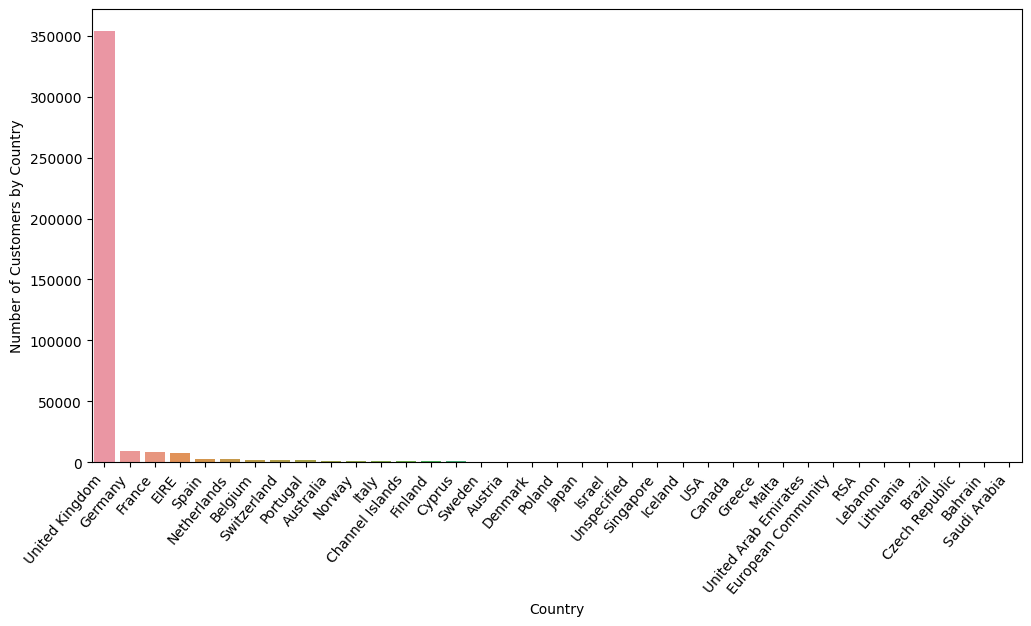

In [24]:
country_df = pd.DataFrame(df.groupby('Country')['Country'].count())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.index, y=country_df['Number of Customers by Country'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

# **Top 5 country**

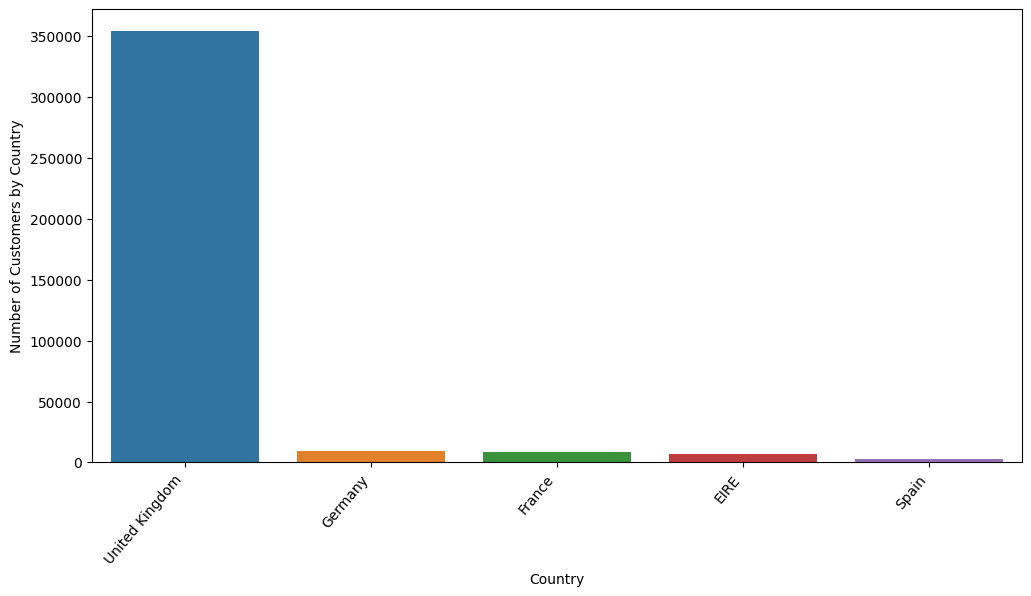

In [27]:
country_df = pd.DataFrame(df.groupby('Country')['Country'].count())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.index[:5], y=country_df['Number of Customers by Country'][:5])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

# **bottom 5 country**

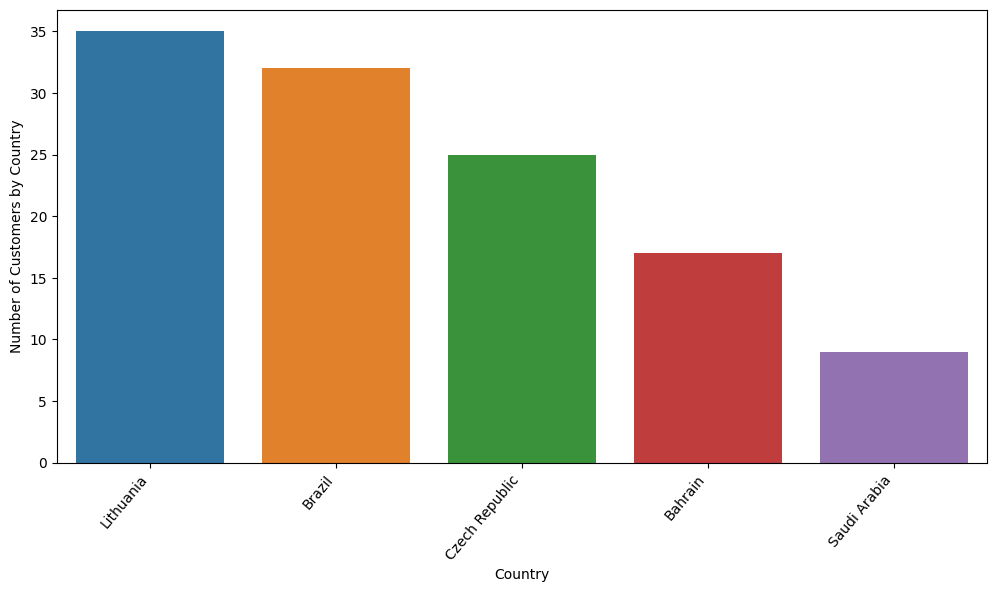

In [28]:
country_df = pd.DataFrame(df.groupby('Country')['Country'].count())
country_df.columns = ['Number of Customers by Country']
country_df.sort_values('Number of Customers by Country', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.index[-5:], y=country_df['Number of Customers by Country'][-5:])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

In [29]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **'Description' feature analysis**

In [30]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1724
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1397


In [31]:
Description_df.tail()

,Description_Name,Count
3872,BLACK CHRISTMAS FLOCK DROPLET,1
3873,BIG POLKADOT MUG,1
3874,IVORY SHELL HEART EARRINGS,1
3875,WEEKEND BAG VINTAGE ROSE PAISLEY,1
3876,PINK CHRYSANTHEMUMS ART FLOWER,1


# **Top 5 product**

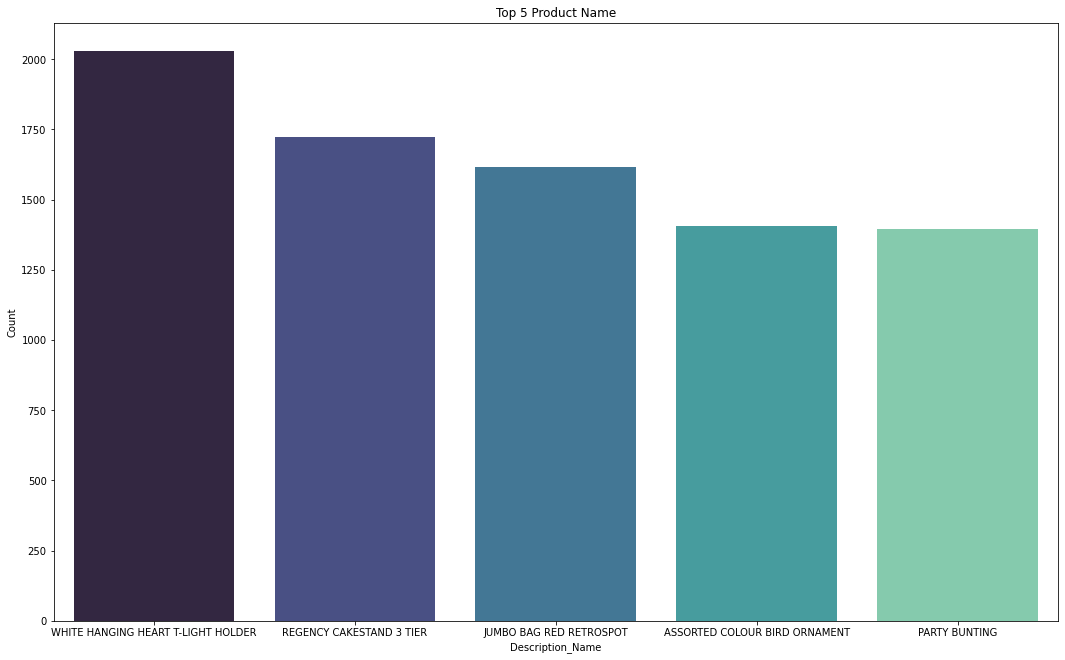

In [40]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5], palette = "mako")

# **Bottom 5 product**

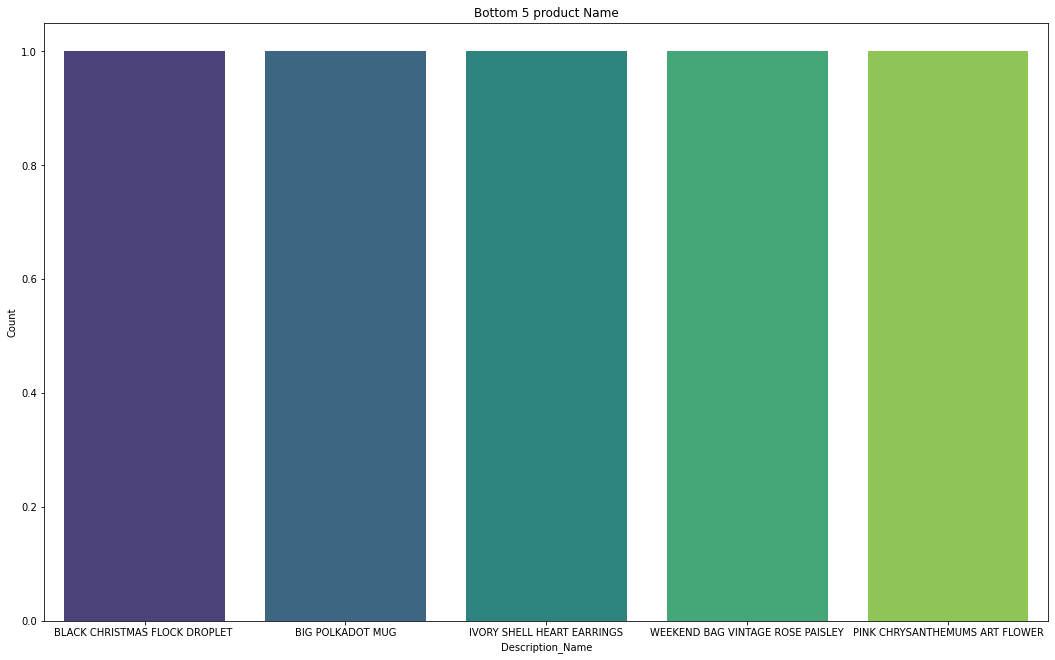

In [41]:
plt.figure(figsize=(18,11))
plt.title('Bottom 5 product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[-5:], palette ="viridis")



  1. LIGHT DECORATION BATTERY OPERATED    
  2. Water damaged    
  3. throw away    
  4. re dotcom quick fix.    
  5. BIRTHDAY BANNER TAPEList item


